In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

# Import datasets
nba_attendance = pd.read_csv("Datasets/NBA_Attendance_2019-2023.csv")
wnba_game_attendance = pd.read_csv("Datasets/WNBA Game Attendance.csv")

In [15]:
# Lists of teams we're considering
wnba_teams = ['Atlanta Dreams','Chicago Sky','Dallas Wings','Indiana Fever','Los Angeles Sparks','Phoenix Mercury','Minnesota Lynx','New York Liberty','Las Vegas Aces','Seattle Storm']
nba_teams = ['Atlanta Hawks','Chicago Bulls','Dallas Mavericks','Indiana Pacers','Los Angeles Lakers','Phoenix Suns','Minnesota Timberwolves','New York Knicks','Golden State Warriors','Oklahoma City Thunder']

In [16]:
# Remove rows with no attendance data
wnba_game_attendance.dropna(subset = ["Attendance"], inplace = True)

In [17]:
# Create dictionary with all games each team played
wnba_team_data = {}
for team in wnba_teams:
    wnba_team_data[team] = wnba_game_attendance.loc[(wnba_game_attendance["Team"] == team) | (wnba_game_attendance["Opponent"] == team)]
    
# Create new dataframe to mat
columns = ["Year",
           "Team",
           "Overall Games",
           "Overall Average",
           "Overall Percent"]

wnba_attendance = pd.DataFrame(columns = columns)
# Go through each team
for team in wnba_team_data:
    team_data = wnba_team_data[team]
    
    # For each team, go through years 2019-2023
    for year in range(2019, 2024):
        cap_sum = 0
        
        # All games that this team played in year
        year_games = team_data[team_data["Year"] == year]
        num_games = year_games.size
        avg_attendance = year_games["Attendance"].mean()
        percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
                
        team_year_data = [year,
                          team,
                          num_games,
                          round(avg_attendance,0),
                          round(percent_attendance,1)]
        
        team_year_data_df = pd.DataFrame([team_year_data], columns = columns)
        
        wnba_attendance = pd.concat([wnba_attendance, team_year_data_df], ignore_index = True)

In [18]:
# Drop duplicate rows in wnba_game_attendance
wnba_game_attendance.drop_duplicates(["Year","Date","Location","Attendance"], inplace = True)

# Drop unnecessary rows in nba_attendance
for row in range(nba_attendance.shape[0]):
    if nba_attendance["Team"][row] not in nba_teams:
        nba_attendance.drop(row, inplace = True)

nba_attendance.reset_index(drop = True, inplace = True)
wnba_attendance.reset_index(drop = True, inplace = True)

In [19]:
# Clean resultant dataframe
wnba_attendance.dropna(inplace = True)
wnba_attendance.reset_index(inplace = True)

In [20]:
rankings = {2019:['Washington Mystics','Conneticut Sun','Los Angeles Sparks','Las Vegas Aces','Chicago Sky','Seattle Storm','Minnesota Lynx','Phoenix Mercury','Indiana Fever','Dallas Wings','New York Liberty','Atlanta Dreams'], 
            2020: ['Las Vegas Aces','Seattle Storm','Los Angeles Sparks','Minnesota Lynx','Phoenix Mercury','Chicago Sky','Conneticut Sun','Washington Mystics','Dallas Wings','Atlanta Dreams','Indiana Fever','New York Liberty'], 
            2021: ['Conneticut Sun','Las Vegas Aces','Minnesota Lynx','Seattle Storm','Phoenix Mercury','Chicago Sky','Dallas Wings','New York Liberty','Washington Mystics','Los Angeles Sparks','Atlanta Dreams','Indiana Fever'], 
            2022: ["Las Vegas Aces",'Chicago Sky','Conneticut Sun','Seattle Storm','Washington Mystics','Dallas Wings','New York Liberty','Phoenix Mercury','Minnesota Lynx','Atlanta Dreams','Los Angeles Sparks','Indiana Fever'], 
            2023: ['Las Vegas Aces','New York Liberty','Conneticut Sun','Dallas Wings','Atlanta Dreams','Minnesota Lynx','Washington Mystics','Chicago Sky','Los Angeles Sparks','Phoenix Mercury','Seattle Storm','Indiana Fever']}

# Create new column called ranking
wnba_attendance.rename(columns = {"index": "Ranking"}, inplace = True)

# Assign values for ranking
for row in range(wnba_attendance.shape[0]):
    team = wnba_attendance["Team"][row]
    year = wnba_attendance["Year"][row]
    try:
        wnba_attendance["Ranking"][row] = rankings[year].index(team) + 1
    except ValueError:
        wnba_attendance["Ranking"][row] = "NA"

# Sort dataframe & reset index
wnba_attendance.sort_values(by = ['Year','Team'], inplace = True)
wnba_attendance.reset_index(drop = True, inplace = True)

nba_attendance.sort_values(by = ['Year','Team'], inplace = True)

In [21]:
# Extract team city and assign to new column
wnba_attendance["City"] = ""
for row in range(wnba_attendance.shape[0]):
    wnba_attendance["City"][row] = wnba_attendance["Team"][row].split(' ', 1)[0]
    
    if wnba_attendance["City"][row] == "Las":
        wnba_attendance["City"][row] = "Las Vegas"
    elif wnba_attendance["City"][row] == "Los":
        wnba_attendance["City"][row] = "Los Angeles"
    elif wnba_attendance["City"][row] == "New":
        wnba_attendance["City"][row] = "New York"
    
nba_attendance["City"] = ""
for row in range(nba_attendance.shape[0]):
    nba_attendance["City"][row] = nba_attendance["Team"][row].split(' ', 1)[0]
    
    if nba_attendance["City"][row] == "Las":
        nba_attendance["City"][row] = "Las Vegas"
    elif nba_attendance["City"][row] == "Los":
        nba_attendance["City"][row] = "Los Angeles"
    elif nba_attendance["City"][row] == "Golden":
        nba_attendance["City"][row] = "San Francisco"
    elif nba_attendance["City"][row] == "Oklahoma":
        nba_attendance["City"][row] = "Oklahoma City"
    elif nba_attendance["City"][row] == "San":
        nba_attendance["City"][row] = "San Antonio"
    elif nba_attendance["Team"][row] == "New York Knicks": #New Orleans, New York
        nba_attendance["City"][row] = "New York"
    elif nba_attendance["Team"][row] == "New Orleans Pelicans":
        nba_attendance["City"][row] = "New Orleans"

nba_cities = nba_attendance["City"].unique()
wnba_cities = wnba_attendance["City"].unique()
cities = np.union1d(nba_cities, wnba_cities) # thanks to ___

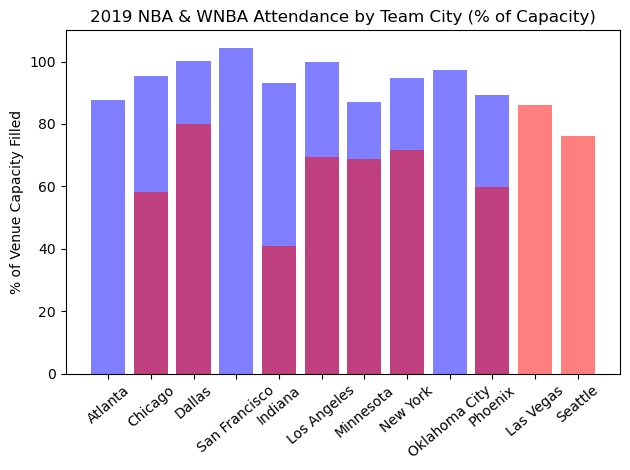

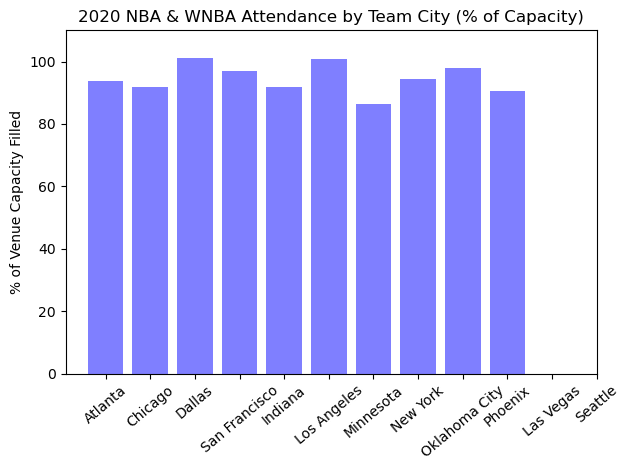

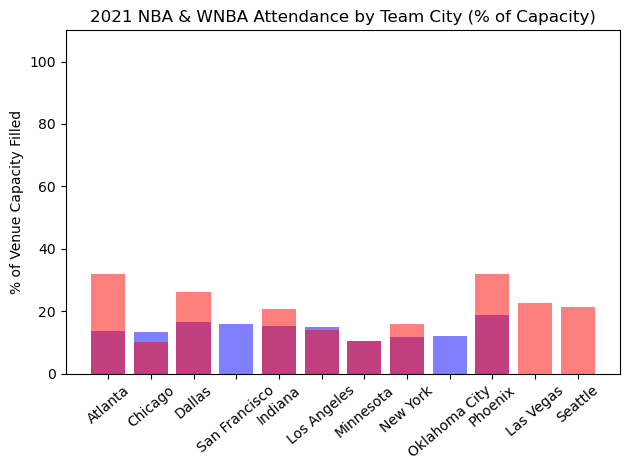

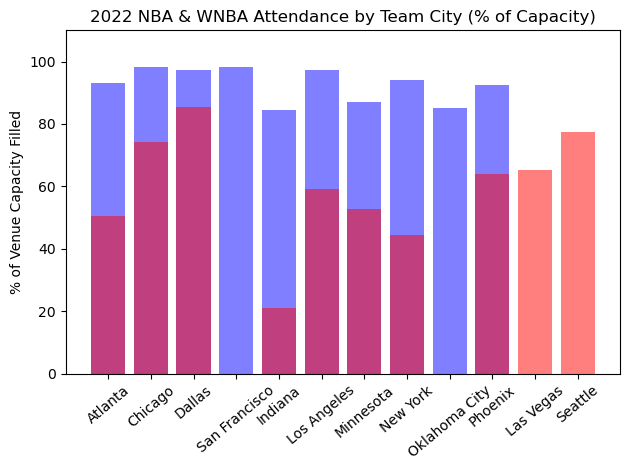

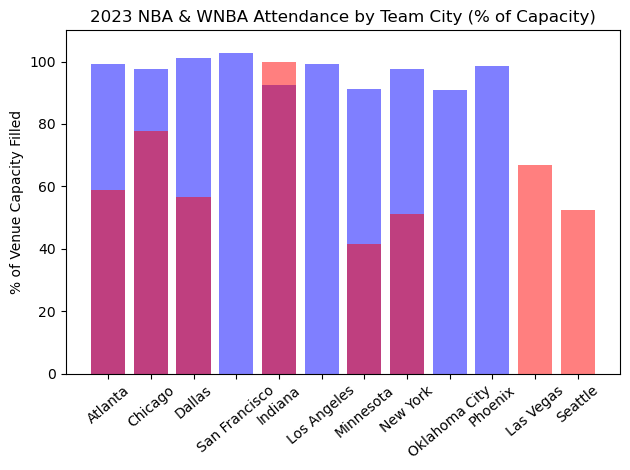

In [39]:
for year in range(2019,2024):
    plt.figure()
    nba_city_year = nba_attendance[nba_attendance["Year"] == year]["City"]
    nba_overall_percent = nba_attendance[nba_attendance["Year"] == year]["Overall Percent"]
            
    wnba_city_year = wnba_attendance[wnba_attendance["Year"] == year]["City"]
    wnba_overall_percent = wnba_attendance[wnba_attendance["Year"] == year]["Overall Percent"]
            
    plt.bar(nba_city_year, nba_overall_percent, color = "blue", alpha = .5)
    plt.bar(wnba_city_year, wnba_overall_percent, color = "red", alpha = .5)
    
    plt.ylim(0,110)
    plt.ylabel("% of Venue Capacity Filled")
    plt.title(f"{year} NBA & WNBA Attendance by Team City (% of Capacity)")
    plt.xticks(ticks = cities, rotation = 40)
    
    plt.tight_layout()
    plt.show
    plt.savefig(f"./graph_outputs/attendance_percentage_{year}.png")

In [23]:
nba_team_stats = pd.read_csv("Datasets/NBA Team Stats.csv")
wnba_team_stats = pd.read_csv("Datasets/WNBA Team Stats.csv")

for row in range(nba_team_stats.shape[0]):
    two_dig_yr = nba_team_stats["Season"][row][-2:]
    nba_team_stats["Season"][row] = int(f"20{two_dig_yr}")

for row in range(wnba_team_stats.shape[0]):
    two_dig_yr = wnba_team_stats["Season"][row][-2:]
    wnba_team_stats["Season"][row] = int(f"20{two_dig_yr}")
    
# Using city data to get around team, since new df has plurals and doesn't match w original
nba_team_stats["City"] = ""
for row in range(nba_team_stats.shape[0]):
    nba_team_stats["City"][row] = nba_team_stats["Team"][row].split(' ', 1)[0]
    
    if nba_team_stats["City"][row] == "Las":
        nba_team_stats["City"][row] = "Las Vegas"
    elif nba_team_stats["City"][row] == "Los":
        nba_team_stats["City"][row] = "Los Angeles"
    elif nba_team_stats["City"][row] == "Golden":
        nba_team_stats["City"][row] = "San Francisco"
    elif nba_team_stats["City"][row] == "Oklahoma":
        nba_team_stats["City"][row] = "Oklahoma City"
    elif nba_team_stats["City"][row] == "San":
        nba_team_stats["City"][row] = "San Antonio"
    elif nba_team_stats["Team"][row] == "New York Knicks": #New Orleans, New York
        nba_team_stats["City"][row] = "New York"
    elif nba_team_stats["Team"][row] == "New Orleans Pelicans":
        nba_team_stats["City"][row] = "New Orleans"
    
wnba_team_stats["City"] = ""
for row in range(wnba_team_stats.shape[0]):
    wnba_team_stats["City"][row] = wnba_team_stats["Team"][row].split(' ', 1)[0]
    
    if wnba_team_stats["City"][row] == "Las":
        wnba_team_stats["City"][row] = "Las Vegas"
    elif wnba_team_stats["City"][row] == "Los":
        wnba_team_stats["City"][row] = "Los Angeles"
    elif wnba_team_stats["City"][row] == "New":
        wnba_team_stats["City"][row] = "New York"

In [49]:
# NBA
nba_attendance["PTS Avg"] = ""
nba_attendance["AST Avg"] = ""
nba_attendance["3PM Avg"] = ""

for row in range(nba_attendance.shape[0]):
    year = nba_attendance["Year"][row]  
    city = nba_attendance["City"][row]
    
    # PTS Column
    nba_city_season = nba_team_stats[(nba_team_stats["Season"] == year) & (nba_team_stats["City"] == city)]
    nba_attendance["PTS Avg"][row] = nba_city_season["PTS"].mean()
    
    # AST Column
    nba_city_season = nba_team_stats[(nba_team_stats["Season"] == year) & (nba_team_stats["City"] == city)]
    nba_attendance["AST Avg"][row] = nba_city_season["AST"].mean()
    
    # 3PM Column
    nba_city_season = nba_team_stats[(nba_team_stats["Season"] == year) & (nba_team_stats["City"] == city)]
    nba_attendance["3PM Avg"][row] = nba_city_season["3PM"].mean()

# WNBA
wnba_attendance["PTS Avg"] = ""
wnba_attendance["AST Avg"] = ""
wnba_attendance["3PM Avg"] = ""

for row in range(wnba_attendance.shape[0]):
    year = wnba_attendance["Year"][row]  
    city = wnba_attendance["City"][row]
    
    # PTS Column
    wnba_city_season = wnba_team_stats[(wnba_team_stats["Season"] == year) & (wnba_team_stats["City"] == city)]
    wnba_attendance["PTS Avg"][row] = wnba_city_season["PTS"].mean()
    
    # AST Column
    wnba_city_season = wnba_team_stats[(wnba_team_stats["Season"] == year) & (wnba_team_stats["City"] == city)]
    wnba_attendance["AST Avg"][row] = wnba_city_season["AST"].mean()
    
    # 3PM Column
    wnba_city_season = wnba_team_stats[(wnba_team_stats["Season"] == year) & (wnba_team_stats["City"] == city)]
    wnba_attendance["3PM Avg"][row] = wnba_city_season["3PM"].mean()

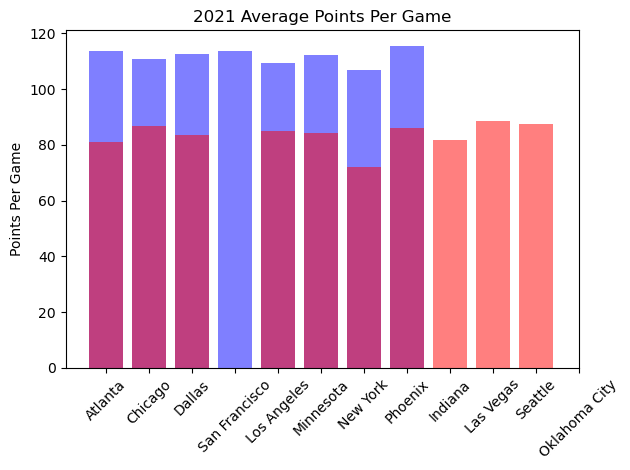

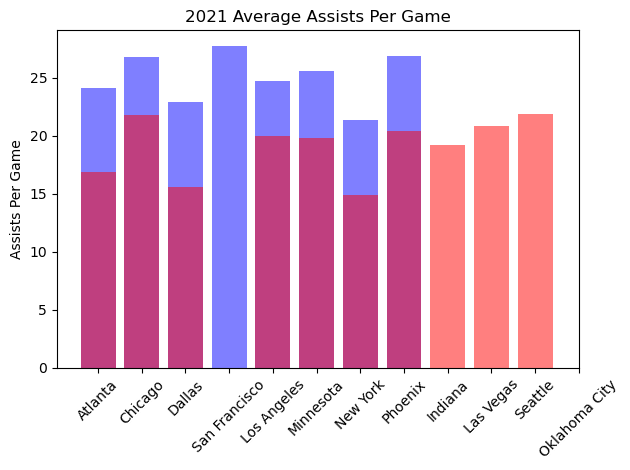

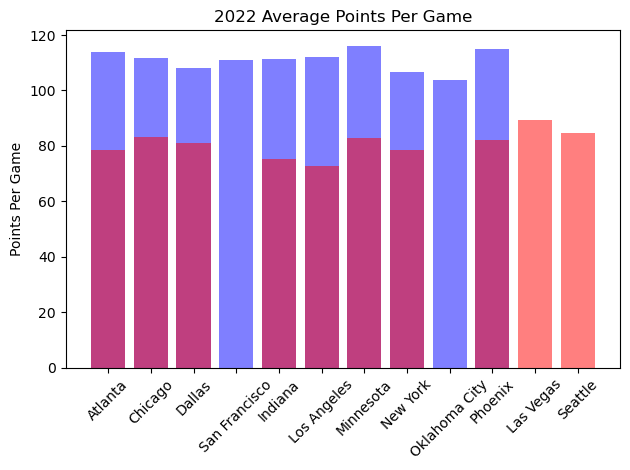

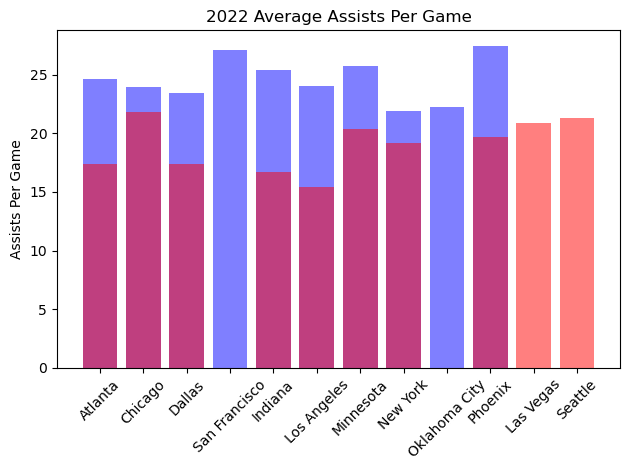

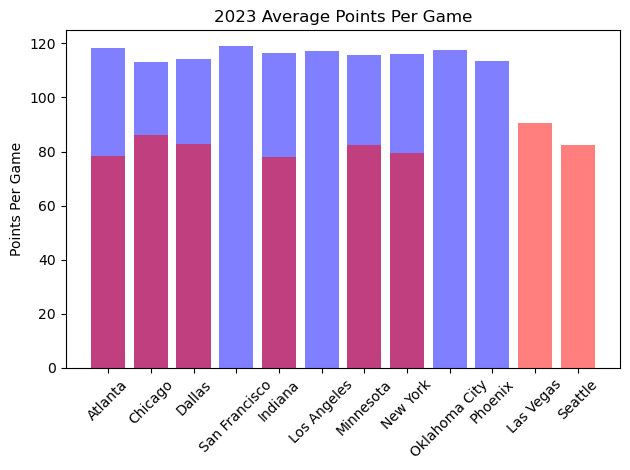

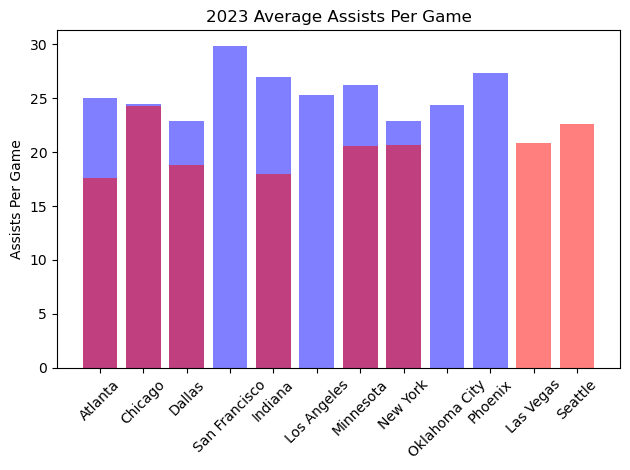

In [107]:
for year in range(2021,2024):
    plt.figure()
    nba_city_year = nba_attendance[nba_attendance["Year"] == year]["City"]
    nba_pts = nba_attendance[nba_attendance["Year"] == year]["PTS Avg"]
    nba_ast = nba_attendance[nba_attendance["Year"] == year]["AST Avg"]
    nba_3pm = nba_attendance[nba_attendance["Year"] == year]["3PM Avg"]
    
    wnba_city_year = wnba_attendance[wnba_attendance["Year"] == year]["City"]
    wnba_pts = wnba_attendance[wnba_attendance["Year"] == year]["PTS Avg"]
    wnba_ast = wnba_attendance[wnba_attendance["Year"] == year]["AST Avg"]
    wnba_3pm = wnba_attendance[wnba_attendance["Year"] == year]["3PM Avg"]
    
    plt.bar(nba_city_year, nba_pts, color = "blue", alpha = .5)
    plt.bar(wnba_city_year, wnba_pts, color = "red", alpha = .5)
    
    plt.title(f"{year} Average Points Per Game")
    plt.xticks(ticks = cities, rotation = 45)
    plt.ylabel("Points Per Game")
    
    plt.tight_layout()
    plt.show
    plt.savefig(f"./graph_outputs/Points Comparison_{year}.png")
    
    
    plt.figure()
    plt.bar(nba_city_year, nba_ast, color = "blue", alpha = .5)
    plt.bar(wnba_city_year, wnba_ast, color = "red", alpha = .5)
    
    plt.title(f"{year} Average Assists Per Game")
    plt.xticks(ticks = cities, rotation = 45)
    plt.ylabel("Assists Per Game")
    
    plt.tight_layout()
    plt.show
    plt.savefig(f"./graph_outputs/Assists Comparison_{year}.png")
    
#     plt.figure()
#     plt.bar(nba_city_year, nba_3pm, color = "blue", alpha = .5)
#     plt.bar(wnba_city_year, wnba_3pm, color = "red", alpha = .5)
#     plt.title(f"{year} NBA & WNBA 3 Points")
#     plt.xticks(ticks = cities, rotation = 'vertical')
#     plt.show
#     plt.savefig(f"./graph_outputs/3 Pointers Comparison_{year}.png")

In [99]:
wnba_attendance.dropna(inplace = True)
nba_attendance.dropna(inplace = True)

wnba_restricted_attendance_percent = list(wnba_attendance["Overall Percent"])
nba_restricted_attendance_percent = list(nba_attendance["Overall Percent"])

wnba_restricted_pts = list(wnba_attendance["PTS Avg"])
nba_restricted_pts = list(nba_attendance["PTS Avg"])

wnba_restricted_ast = list(wnba_attendance["AST Avg"])
nba_restricted_ast = list(nba_attendance["AST Avg"])

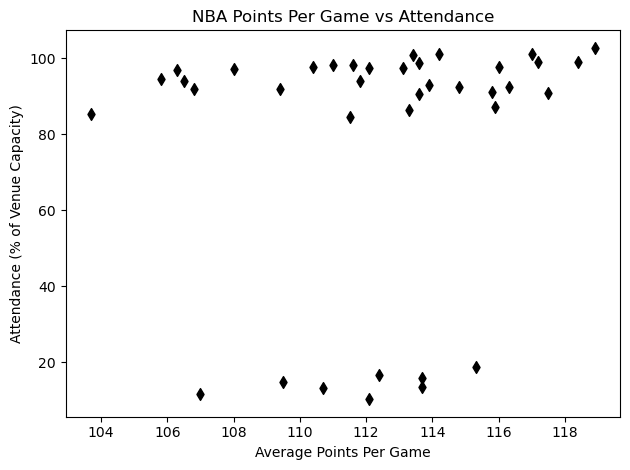

The correlation between nba attendance and points scored per game is 0.12620227020116248


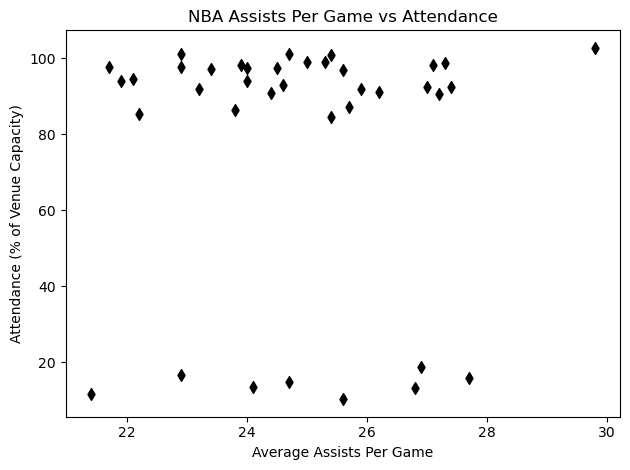

The correlation between nba attendance and assists per game is 0.11199024564515776


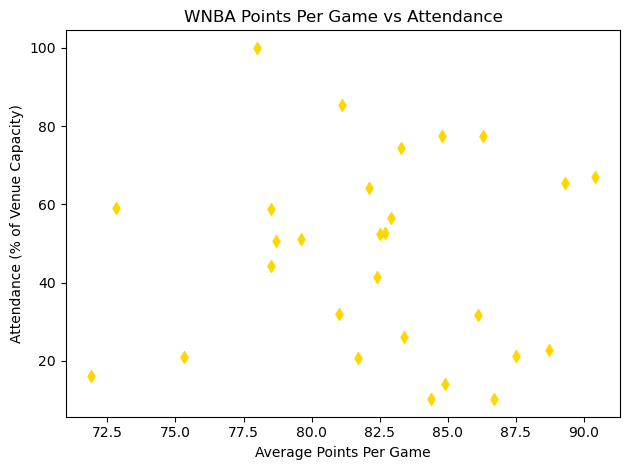

The correlation between wnba attendance and points scored per game is -0.02604180578394036


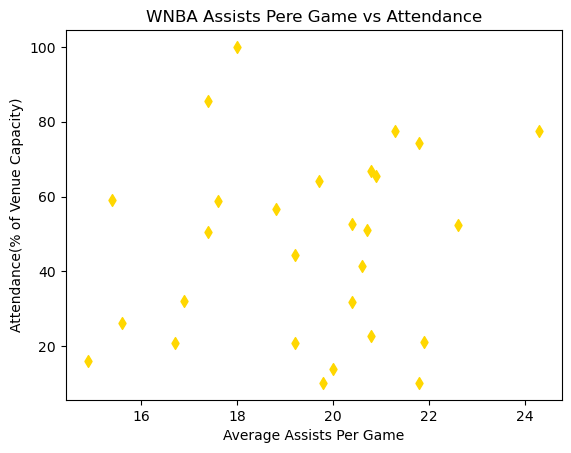

The correlation between wnba attendance and assists per game is -0.13459846025385921


<Figure size 640x480 with 0 Axes>

In [113]:
plt.scatter(nba_restricted_pts, nba_restricted_attendance_percent, marker = "d", color = "black")
pts_attendance_corr = st.pearsonr(nba_restricted_pts, nba_restricted_attendance_percent)[0]
plt.title("NBA Points Per Game vs Attendance")
plt.ylabel("Attendance (% of Venue Capacity)")
plt.xlabel("Average Points Per Game")
plt.tight_layout()
plt.show()
plt.savefig(f"./graph_outputs/NBA attendance vs pts.png")
print(f"The correlation between nba attendance and points scored per game is {pts_attendance_corr}")

plt.scatter(nba_restricted_ast, nba_restricted_attendance_percent, marker = "d", color = "black")
ast_attendance_corr = st.pearsonr(nba_ast, nba_overall_percent)[0]
plt.title("NBA Assists Per Game vs Attendance")
plt.ylabel("Attendance (% of Venue Capacity)")
plt.xlabel("Average Assists Per Game")
plt.tight_layout()
plt.show()
plt.savefig(f"./graph_outputs/NBA attendance vs assists.png")
print(f"The correlation between nba attendance and assists per game is {ast_attendance_corr}")

plt.scatter(wnba_restricted_pts, wnba_restricted_attendance_percent, marker = "d", color = "gold")
pts_attendance_corr = st.pearsonr(wnba_restricted_pts, wnba_restricted_attendance_percent)[0]
plt.title("WNBA Points Per Game vs Attendance")
plt.ylabel("Attendance (% of Venue Capacity)")
plt.xlabel("Average Points Per Game")
plt.tight_layout()
plt.show()
plt.savefig(f"./graph_outputs/WNBA attendance vs pts.png")
print(f"The correlation between wnba attendance and points scored per game is {pts_attendance_corr}")

plt.scatter(wnba_restricted_ast, wnba_restricted_attendance_percent, marker = "d", color = "gold")
ast_attendance_corr = st.pearsonr(wnba_ast, wnba_overall_percent)[0]
plt.title("WNBA Assists Pere Game vs Attendance")
plt.ylabel("Attendance(% of Venue Capacity)")
plt.xlabel("Average Assists Per Game")
plt.show()
plt.savefig(f"./graph_outputs/WNBA attendance vs assists.png")
print(f"The correlation between wnba attendance and assists per game is {ast_attendance_corr}")